<a href="https://colab.research.google.com/github/hlxie22/MNIST-Neural-Network/blob/main/Cancer%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the dataset


In [62]:
import gdown 
import pandas as pd
from sklearn import metrics

# gdown.download('https://drive.google.com/uc?id=1grV8hSxULsGvnbwEMPjPaknccfIOlcoB','cancer_data.csv',True);

from google.cloud import storage
def download_public_file(bucket_name, source_blob_name, destination_file_name):
    storage_client = storage.Client.create_anonymous_client()

    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(source_blob_name)
    blob.download_to_filename(destination_file_name)

    print(
        "Downloaded public blob {} from bucket {} to {}.".format(
            source_blob_name, bucket.name, destination_file_name
        )
    )

download_public_file('inspirit-ai-data-bucket-1','Data/AI Scholars/Sessions 1 - 5/Session 2b - Logistic Regression/cancer.csv','cancer_data.csv')

data = pd.read_csv('cancer_data.csv')
data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
data.to_csv('cancer_data.csv')
del data

Downloaded public blob Data/AI Scholars/Sessions 1 - 5/Session 2b - Logistic Regression/cancer.csv from bucket inspirit-ai-data-bucket-1 to cancer_data.csv.


In [63]:
# Import helpful Python tools for loading/navigating data
import os             
import numpy as np   
import pandas as pd  
from sklearn.metrics import accuracy_score  


In [64]:
data_path  = 'cancer_data.csv'

dataframe = pd.read_csv(data_path)

dataframe = dataframe[['diagnosis', 'perimeter_mean', 'radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean']]
dataframe['diagnosis_cat'] = dataframe['diagnosis'].astype('category').map({1: '1 (malignant)', 0: '0 (benign)'})

# Exploring the dataset


In [65]:
dataframe.head()


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat
0,1,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1 (malignant)
1,1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1 (malignant)
2,1,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1 (malignant)
3,1,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1 (malignant)
4,1,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1 (malignant)


In [66]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   diagnosis        569 non-null    int64   
 1   perimeter_mean   569 non-null    float64 
 2   radius_mean      569 non-null    float64 
 3   texture_mean     569 non-null    float64 
 4   area_mean        569 non-null    float64 
 5   smoothness_mean  569 non-null    float64 
 6   concavity_mean   569 non-null    float64 
 7   symmetry_mean    569 non-null    float64 
 8   diagnosis_cat    569 non-null    category
dtypes: category(1), float64(7), int64(1)
memory usage: 36.4 KB


 ## Visualizing the dataset


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn

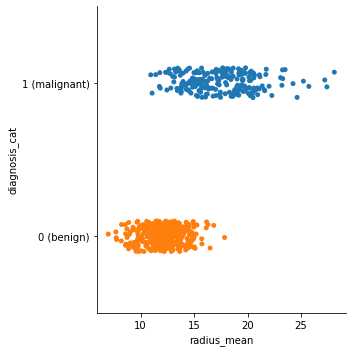

In [68]:
# Focus first on mean radius

sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])

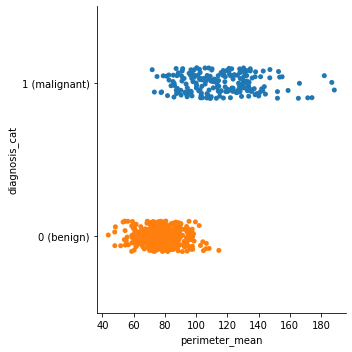

In [69]:
# Use Perimeter Mean

sns.catplot(x = 'perimeter_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'] )

# Predicting Diagnosis 


# Simple Boundary Classifier


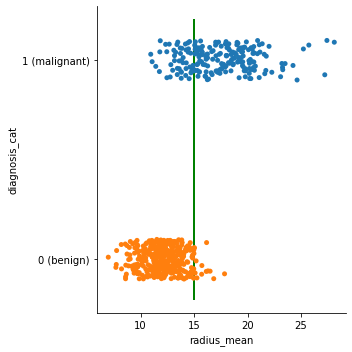

In [70]:
boundary = 15

sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', data = dataframe, order=['1 (malignant)', '0 (benign)'])
plt.plot([boundary, boundary], [-.2, 1.2], 'g', linewidth = 2)

In [71]:
def boundary_classifier(target_boundary, radius_mean_series):
  result = [] #fill this in with predictions!
  # YOUR CODE HERE
  for x in radius_mean_series:
    if x >= target_boundary:
      result.append(1)
    else: 
      result.append(0)
  return result

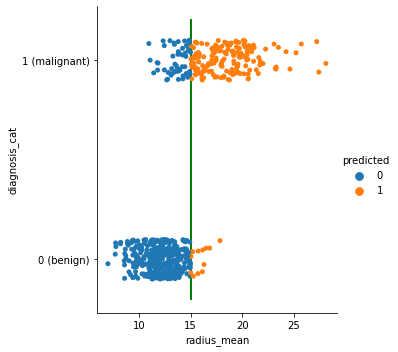

In [72]:
chosen_boundary = 15

y_pred = boundary_classifier(chosen_boundary, dataframe['radius_mean'])
dataframe['predicted'] = y_pred

y_true = dataframe['diagnosis']

sns.catplot(x = 'radius_mean', y = 'diagnosis_cat', hue = 'predicted', data = dataframe, order=['1 (malignant)', '0 (benign)'])
plt.plot([chosen_boundary, chosen_boundary], [-.2, 1.2], 'g', linewidth = 2)

In [73]:
print (list(y_true))
print (y_pred)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 

In [74]:
accuracy = accuracy_score(y_true,y_pred)
print(accuracy)

0.8875219683655536


In [75]:
max_accuracy = 0
best_boundary = 15

for i in range(10000, 15000, 1):
  chosen_boundary = i * 0.001
  y_pred = boundary_classifier(chosen_boundary, dataframe['radius_mean'])
  
  y_true = dataframe['diagnosis']
  accuracy = accuracy_score(y_true,y_pred)

  if accuracy > max_accuracy:
    max_accuracy = accuracy
    best_boundary = chosen_boundary

print(best_boundary)
print(max_accuracy)


14.971
0.8875219683655536


# Logistic Regression


In [97]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

In [77]:
print('Number of rows in training dataframe:', train_df.shape[0])
train_df.head()

Number of rows in training dataframe: 455


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
408,1,117.80,17.99,20.66,991.7,0.10360,0.120100,0.1992,1 (malignant),1
4,1,135.10,20.29,14.34,1297.0,0.10030,0.198000,0.1809,1 (malignant),1
307,0,56.36,9.00,14.40,246.3,0.07005,0.003681,0.1788,0 (benign),0
386,0,78.78,12.21,14.09,462.0,0.08108,0.068390,0.1646,0 (benign),0
404,0,78.29,12.34,14.95,469.1,0.08682,0.021090,0.1571,0 (benign),0


In [78]:
print('Number of rows in test dataframe:', test_df.shape[0])
test_df.head()

Number of rows in test dataframe: 114


,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
421,0,98.22,14.69,13.98,656.1,0.10310,0.14500,0.2086,0 (benign),0
47,1,85.98,13.17,18.66,534.6,0.11580,0.12260,0.2128,1 (malignant),0
292,0,83.14,12.95,16.02,513.7,0.10050,0.06155,0.1730,0 (benign),0
186,1,118.60,18.31,18.58,1041.0,0.08588,0.08169,0.1621,1 (malignant),1
414,1,96.71,15.13,29.81,719.5,0.08320,0.04686,0.1852,1 (malignant),1


In [98]:
X = ['radius_mean']
y = 'diagnosis'

X_train = train_df[X]
print('X_train, our input variables:')
print(X_train.head())
print()

y_train = train_df[y]
print('y_train, our output variable:')
print(y_train.head())

X_train, our input variables:
     radius_mean
408        17.99
4          20.29
307         9.00
386        12.21
404        12.34

y_train, our output variable:
408    1
4      1
307    0
386    0
404    0
Name: diagnosis, dtype: int64


In [80]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()

In [81]:
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [82]:
X_test = test_df[X]
y_test = test_df[y]

print(X_test.head())

     radius_mean
421        14.69
47         13.17
292        12.95
186        18.31
414        15.13


In [83]:
y_pred = logreg_model.predict(X_test)

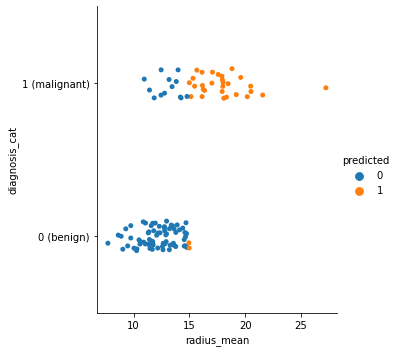

In [84]:
test_df['predicted'] = y_pred.squeeze()
sns.catplot(x = X[0], y = 'diagnosis_cat', hue = 'predicted', data=test_df, order=['1 (malignant)', '0 (benign)'])

In [85]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.868421052631579


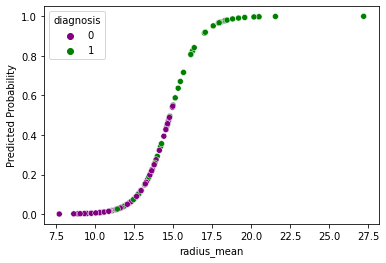

In [86]:
y_prob = logreg_model.predict_proba(X_test)
X_test_view = X_test[X].values.squeeze()
plt.xlabel('radius_mean')
plt.ylabel('Predicted Probability')
sns.scatterplot(x = X_test_view, y = y_prob[:,1], hue = y_test, palette=['purple','green'])

# Multiple Feature Logistic Regression 


In [87]:
dataframe.head()

,diagnosis,perimeter_mean,radius_mean,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,diagnosis_cat,predicted
0,1,122.80,17.99,10.38,1001.0,0.11840,0.3001,0.2419,1 (malignant),1
1,1,132.90,20.57,17.77,1326.0,0.08474,0.0869,0.1812,1 (malignant),1
2,1,130.00,19.69,21.25,1203.0,0.10960,0.1974,0.2069,1 (malignant),1
3,1,77.58,11.42,20.38,386.1,0.14250,0.2414,0.2597,1 (malignant),0
4,1,135.10,20.29,14.34,1297.0,0.10030,0.1980,0.1809,1 (malignant),1


In [88]:
X = ['radius_mean', 'perimeter_mean', 'area_mean']
y = 'diagnosis'

# 1. Split data into train and test
train_df, test_df = train_test_split(dataframe, test_size = 0.2, random_state = 1)

# 2. Prepare your X_train, X_test, y_train, and y_test variables by extracting the appropriate columns:

X_train = train_df[X]
X_test = test_df[X]
y_train = train_df[y]
y_test = test_df[y]

# 3. Initialize the model object

logreg_model = LogisticRegression()

# 4. Fit the model to the training data

logreg_model.fit(X_train, y_train)

# 5. Use this trained model to predict on the test data

y_pred = logreg_model.predict(X_test)

# 6. Evaluate the accuracy by comparing to to the test labels and print out accuracy.

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.868421052631579


###Confusion Matrix


Text(0.5, 257.44, 'Predicted diagnosis')

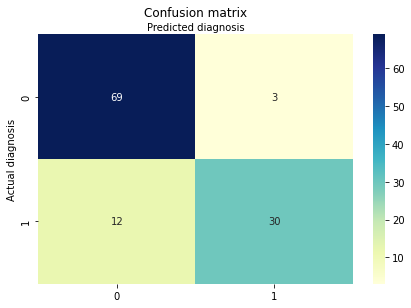

In [89]:
# Import the metrics class
from sklearn import metrics

# Create the Confusion Matrix
# y_test = dataframe['diagnosis']
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
class_names = [0,1] # Our diagnosis categories

fig, ax = plt.subplots()
# Setting up and visualizing the plot
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')

In [90]:
print (cnf_matrix)
(tn, fp), (fn, tp) = cnf_matrix
print ("TN, FP, FN, TP:", tn, fp, fn, tp)

[[69  3]
 [12 30]]
TN, FP, FN, TP: 69 3 12 30


In [91]:
print(metrics.recall_score(y_test, y_pred))

0.7142857142857143


# Decision Trees Approach


In [92]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100)

# We use our previous `X_train` and `y_train` sets to build the model
forest.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
# Find the predictions based on the model
y_pred = forest.predict(X_test)

In [94]:
# Calculate model performance
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.8596491228070176
Precision:  0.90625
Recall:  0.6904761904761905


In [104]:
X = ['radius_mean']
y = 'diagnosis'

X_train = train_df[X]
X_test = test_df[X]
y_train = train_df[y]
y_test = test_df[y]

   accuracy precision    recall
0  0.798246  0.787879  0.619048
1  0.877193       1.0  0.666667
2  0.868421  0.935484  0.690476
3  0.815789      0.92  0.547619
4  0.798246  0.827586  0.571429
5  0.877193  0.966667  0.690476
6  0.868421       1.0  0.642857
7  0.868421       1.0  0.642857
8  0.868421       1.0  0.642857


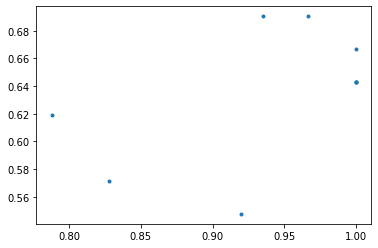

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    SVC(C=0.025, kernel='linear'),
    GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()] 


columns = ['accuracy','precision','recall']
results = pd.DataFrame(columns = columns)

i = 0

for clf in classifiers:
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  acc = metrics.accuracy_score(y_test, y_pred)
  prec = metrics.precision_score(y_test, y_pred)
  rec = metrics.recall_score(y_test, y_pred)
  results.loc[i, ['accuracy', 'precision', 'recall']] = [acc, prec, rec]
  i += 1

print (results)

plt.plot(results['precision'],results['recall'],'.')

plt.show()